# Folium 설치

In [1]:
#!pip3 install folium

In [2]:
import numpy as np
import pandas as pd
import folium

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
#한글깨짐 해결
!pip3 install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to c:\users\admin\appdata\local\temp\pip-req-build-w72u1y4q
  Resolved https://github.com/python-visualization/branca.git to commit 52b10bd969ac25d0b70640b2eee2ea1d8e8690b3


  Running command git clone -q https://github.com/python-visualization/branca.git 'C:\Users\admin\AppData\Local\Temp\pip-req-build-w72u1y4q'


# 지도 표현

In [5]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025]
)
m

In [6]:
m.save('index.html')

# tooltip & marker

In [7]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

folium.Marker(
    [33.3684955195788, 126.52918183373025],
    popup = '<strong>hello world</strong>',
    tooltip = tooltip
).add_to(m)

m

# 마커 여러개 표시

In [8]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

folium.Marker(
    [33.361593, 126.527879],
    popup = '<strong>한라산</strong>',
    tooltip = tooltip
).add_to(m)

folium.Marker(
    [33.510143, 126.491514],
    popup = '<strong>제주국제공항</strong>',
    tooltip = tooltip
).add_to(m)


folium.Marker(
    [33.508315, 126.541070],
    popup = '<strong>바울랩</strong>',
    tooltip = tooltip
).add_to(m)

m

# Icon

In [9]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

folium.Marker(
    [33.361593, 126.527879],
    popup = '<strong>한라산</strong>',
    tooltip = tooltip,
    icon = folium.Icon(color='#ff0000', icon='info-sign')
).add_to(m)

folium.Marker(
    [33.510143, 126.491514],
    popup = '<strong>제주국제공항</strong>',
    tooltip = tooltip,
    icon = folium.Icon(color='green', icon='bookmark')
).add_to(m)


folium.Marker(
    [33.508315, 126.541070],
    popup = '<strong>바울랩</strong>',
    tooltip = tooltip
).add_to(m)

m

# 공공데이터포털 데이터

In [10]:
오름 = pd.read_csv('o.csv', encoding='cp949')
오름.tail(1)

,읍면동,오름명,소재지,위도,경도,주차장,화장실,표고(m),데이터기준일자
67,중문동,법정악,제주특별자치도 서귀포시 하원동 산 1,33.258346,126.4521,Y,Y,760.1,2022-05-10


In [11]:
오름.isnull().sum()

읍면동        0
오름명        0
소재지        0
위도         0
경도         0
주차장        0
화장실        0
표고(m)      0
데이터기준일자    0
dtype: int64

In [12]:
오름[['화장실']].value_counts()

화장실
N      41
Y      27
dtype: int64

In [13]:
오름[['주차장']].value_counts()

주차장
Y      37
N      31
dtype: int64

In [14]:
오름.iloc[0]
오름.iloc[0]['오름명']
오름.iloc[0]['위도']
오름.iloc[0]['경도']

126.2907797

In [15]:
오름.shape

(68, 9)

In [16]:
for i in range(오름.shape[0]):
    print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])

송악산(절울이) 33.1994088 126.2907797
섯알오름 33.2042537 126.281676
가시오름  33.2533626 126.2490546
녹남봉 33.2798153 126.1954827
물영아리 33.3708091 126.6935196
머체오름 33.342895 126.6494133
이승이 33.342895 126.6494133
사려니오름 33.342895 126.6494133
민오름 33.3508829 126.6980129
운지오름 33.320538 126.7451549
자배봉 33.342895 126.6494133
생길이 33.342895 126.6494133
큰걸세 33.3616666 126.5291666
족은걸세 33.3616666 126.5291666
수악 33.3616666 126.5291666
한남리머체왓숲길 33.3305697 126.6740675
일출봉 33.4584473 126.9425348
멀미오름 33.4786495 126.8840616
멀미알오름 33.4786495 126.8840616
식산봉(바우오름) 33.4656758 126.9196473
큰물메(대왕수봉) 33.4398545 126.8991383
궁대악 33.4349078 126.8170896
뒤꾸부니 33.4310244 126.8273298
모구리오름 33.4080291 126.8271111
유건에오름 33.4135945 126.8467892
통오름 33.3944955 126.8567401
독자봉 33.3877114 126.8541774
남산봉 33.3860915 126.8081632
낭끼오름 33.4355716 126.842924
모구리알오름 33.4080291 126.8271111
대왕산 33.456482 126.8727771
군산 33.2551426 126.3683605
단산(바굼지오름) 33.2469709 126.3206311
월라봉(다래오름) 33.2442794 126.3499008
대병악(여진머리) 33.3066236 126.3704559
북오름 3

# csv 파일의 좌표에 맞게 마커표시(for문으로 구현)

In [17]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])

    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f"<strong>{오름.iloc[i]['오름명']}</strong>",
        tooltip = tooltip
    ).add_to(m)


m

# 상세 정보 표시

In [18]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])

    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
        주차장 : {오름.iloc[i]["주차장"]}<br>\
        화장실: {오름.iloc[i]["화장실"]}<br>\
        </div>',
        tooltip = tooltip
    ).add_to(m)


m

In [19]:
오름['이미지'] = 오름['오름명']+'.jpg'
오름.head(1)

,읍면동,오름명,소재지,위도,경도,주차장,화장실,표고(m),데이터기준일자,이미지
0,대정읍,송악산(절울이),제주특별자치도 서귀포시 대정읍 상모리 산 2,33.199409,126.29078,Y,Y,104.0,2022-05-10,송악산(절울이).jpg


# 마커에 이미지 표시

In [20]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])

    
    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
        주차장 : {오름.iloc[i]["주차장"]}<br>\
        화장실: {오름.iloc[i]["화장실"]}<br>\
        <img width="80px" src="a.jpg"><br>\
        <a href="https://www.visitjeju.net/kr/search?q=%EC%98%A4%EB%A6%84#">상세페이지 이동</a></div>',
        tooltip = tooltip
    ).add_to(m)


m.save('index.html')

# 경도 위도로 거리 구하기

In [29]:
m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])
    
    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
        주차장 : {오름.iloc[i]["주차장"]}<br>\
        화장실: {오름.iloc[i]["화장실"]}<br>\
        <img width="80px" src="a.jpg"><br>\
        <a href="https://www.visitjeju.net/kr/search?q=%EC%98%A4%EB%A6%84#">상세페이지 이동</a></div>',
        tooltip = tooltip
    ).add_to(m)

    folium.Circle(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        radius = 오름.iloc[i]['표고(m)'],
        color = 'red',
        fill = True
    ).add_to(m)
    
    folium.PolyLine(
        locations = [[33.51063709962625, 126.49139632094533], [오름.iloc[i]['위도'], 오름.iloc[i]['경도']]],
        tooltip = tooltip
    ).add_to(m)

m

In [31]:
#!pip install haversine

In [33]:
from haversine import haversine
#haversine(위치1, 위치2, unit = 'km')

In [37]:
# step3 거리 구하기

m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])
    
    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
        주차장 : {오름.iloc[i]["주차장"]}<br>\
        화장실: {오름.iloc[i]["화장실"]}<br>\
        <img width="80px" src="a.jpg"><br>\
        <a href="https://www.visitjeju.net/kr/search?q=%EC%98%A4%EB%A6%84#">상세페이지 이동</a></div>',
        tooltip = tooltip
    ).add_to(m)

    folium.Circle(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        radius = 오름.iloc[i]['표고(m)'],
        color = 'red',
        fill = True
    ).add_to(m)
    
    location_one = [33.51057448296068, 126.49126757276743]
    location_two = [오름.iloc[i]['위도'], 오름.iloc[i]['경도']]
    거리 = haversine(location_one, location_two, unit = 'km')
    
    folium.PolyLine(
        locations = [location_one, location_two],
        tooltip = f'제주국제공항에서 {오름.iloc[i]["오름명"]}까지 {거리:.2f}km'
    ).add_to(m)

m

### 이미지 아이콘, 그룹 체크박스, 클러스터 표현하기


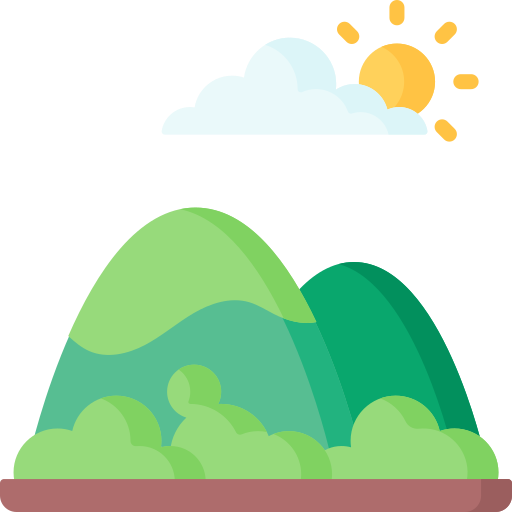
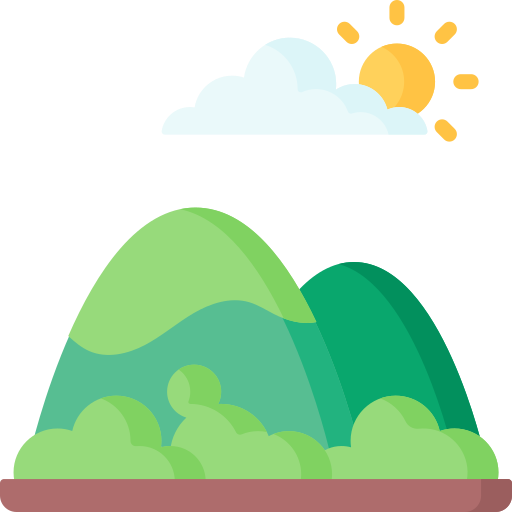
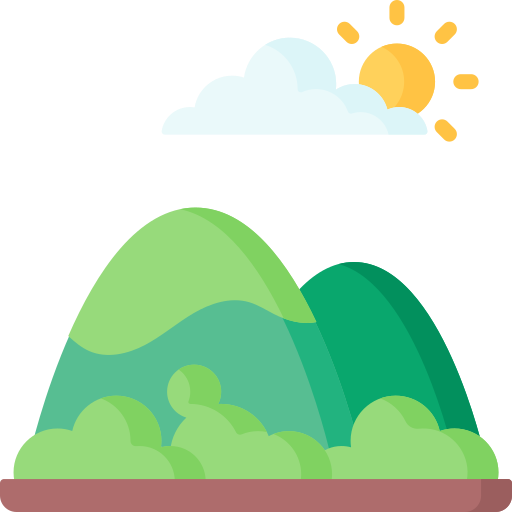
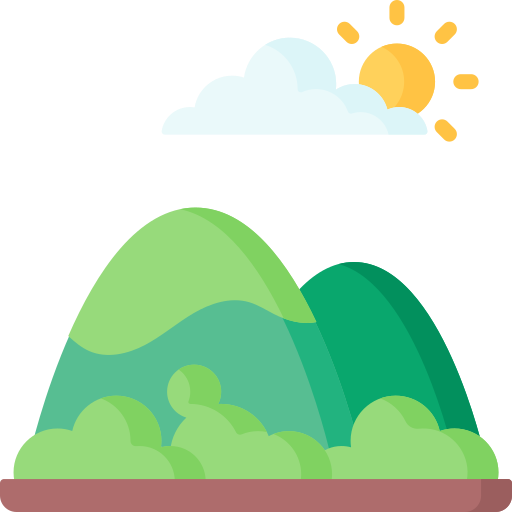
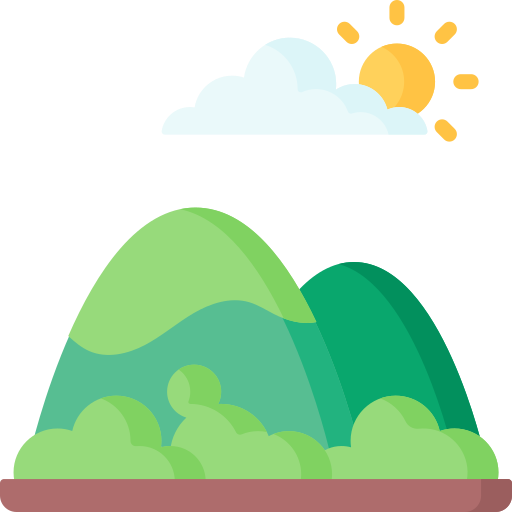
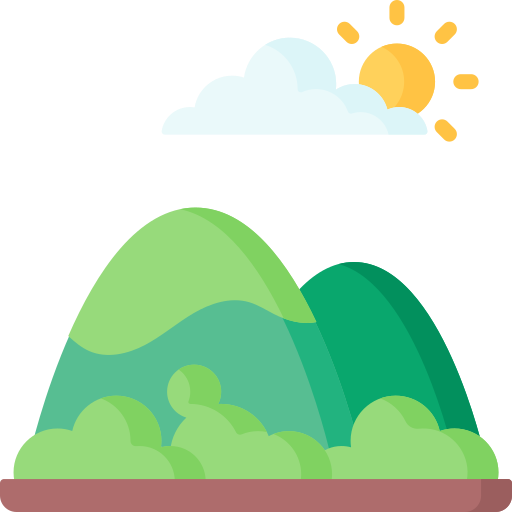
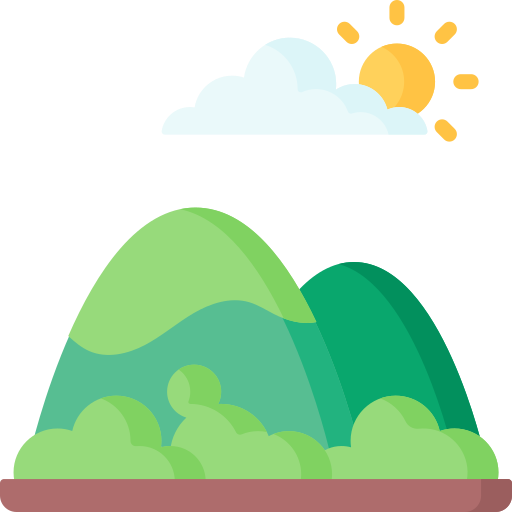
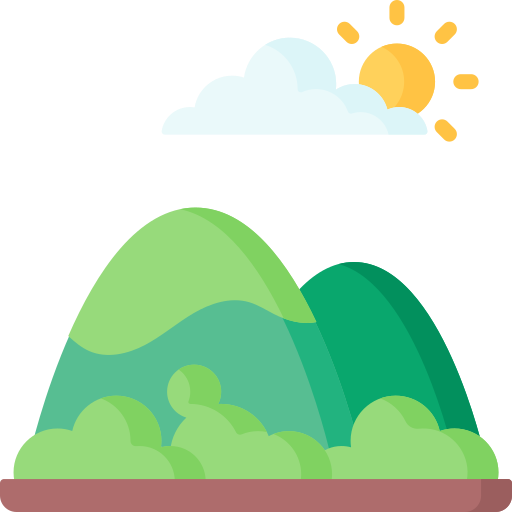
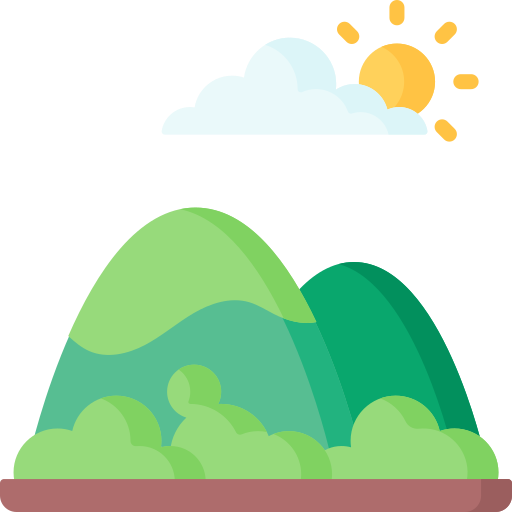
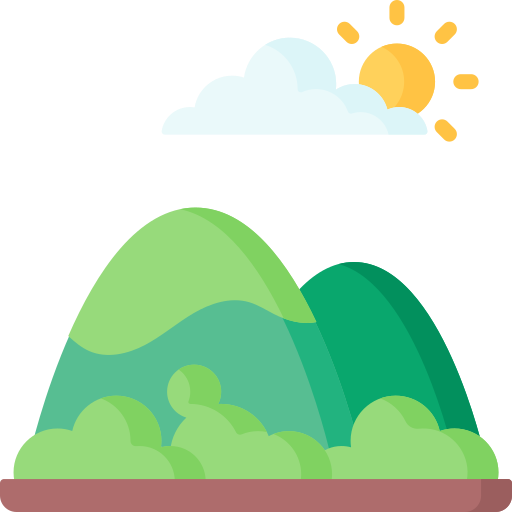
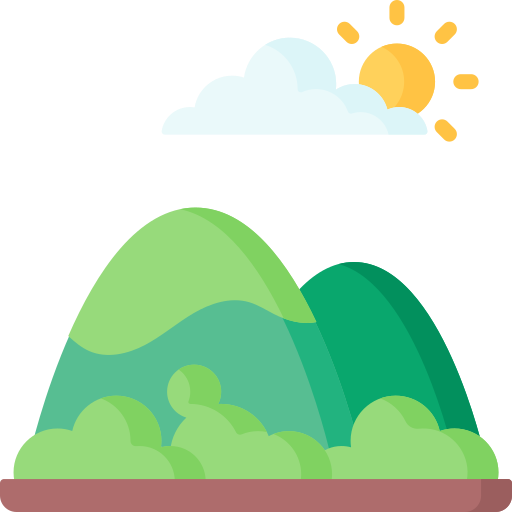
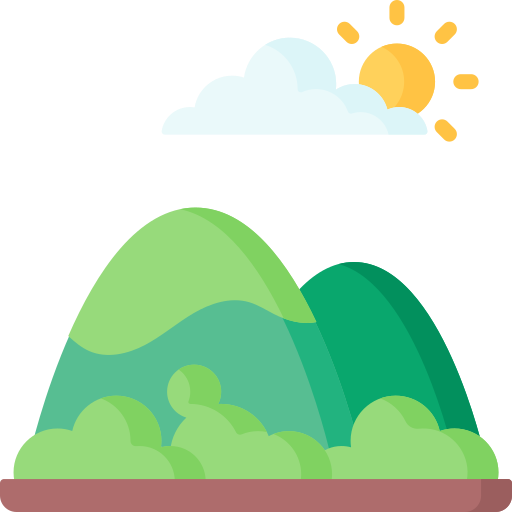
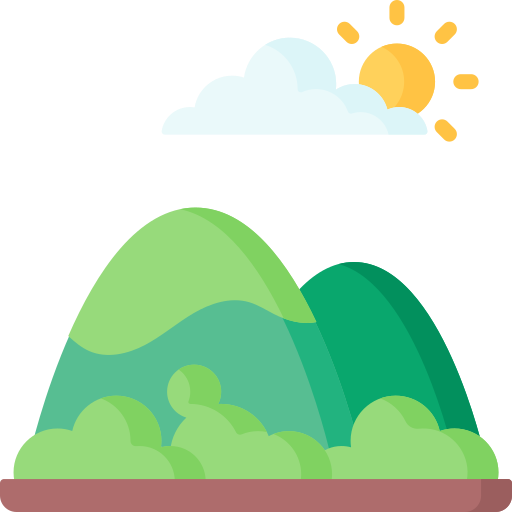
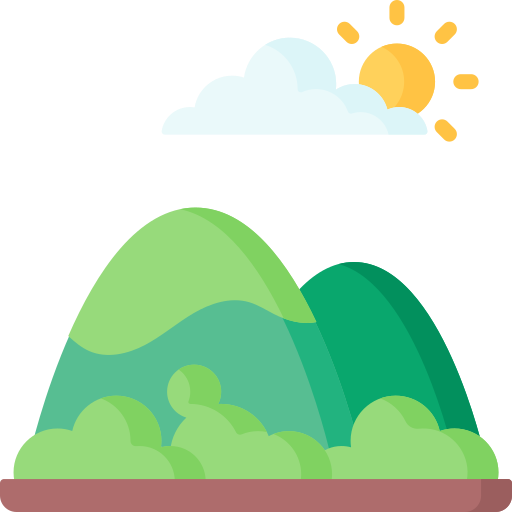
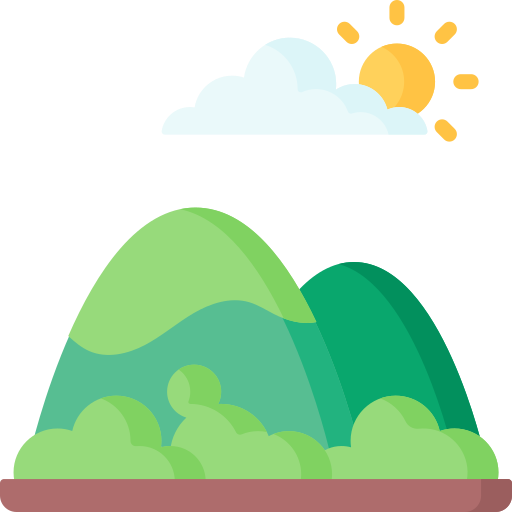
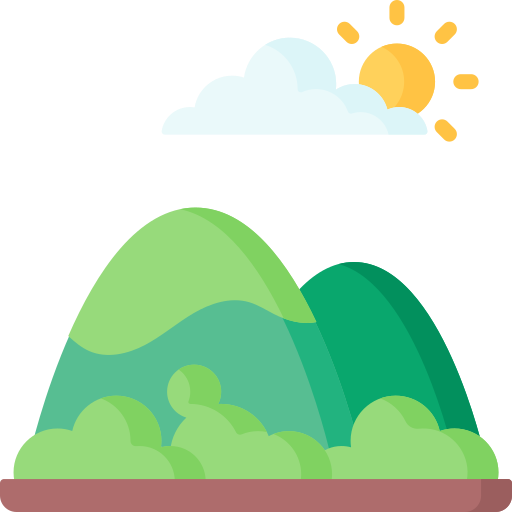
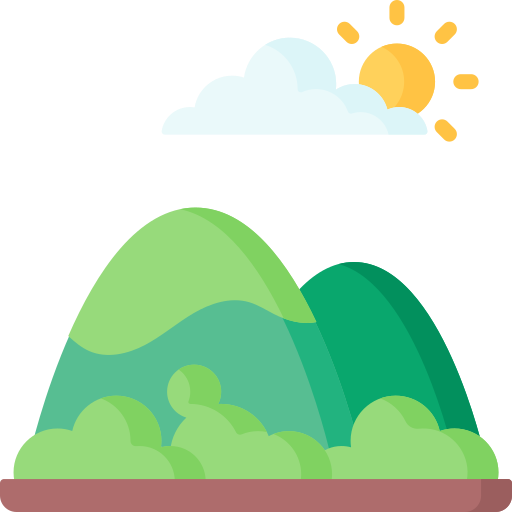
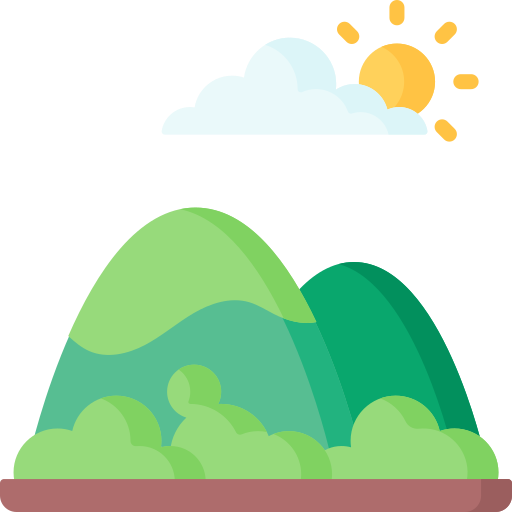
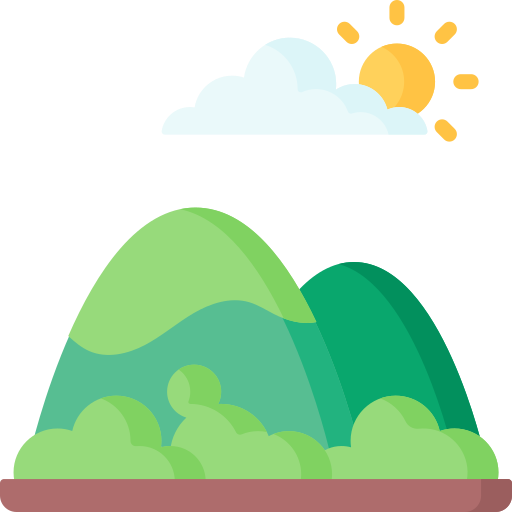
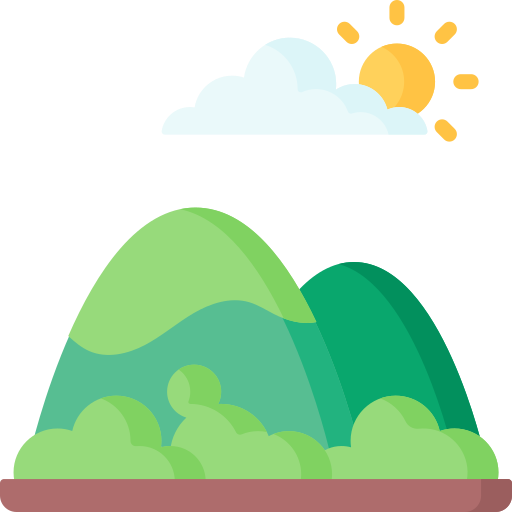
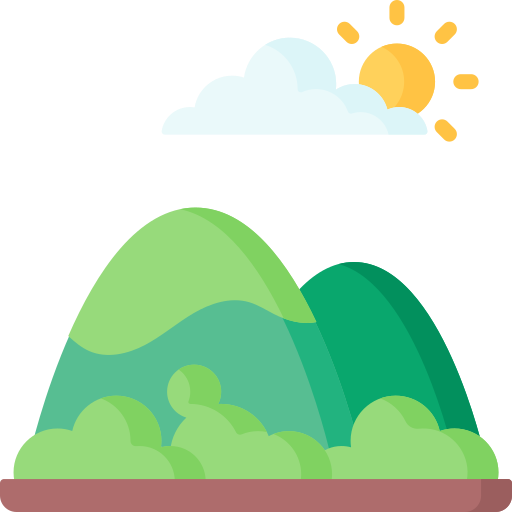
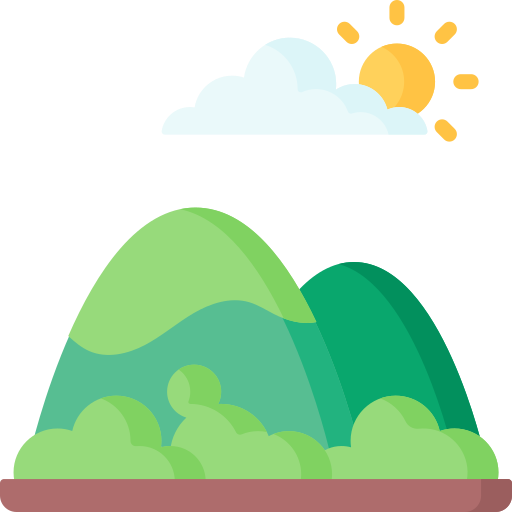
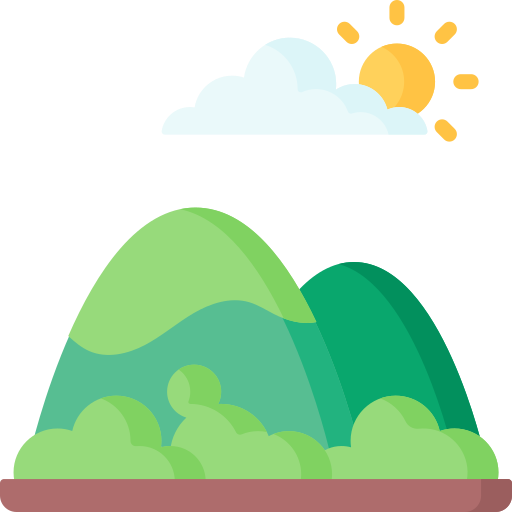
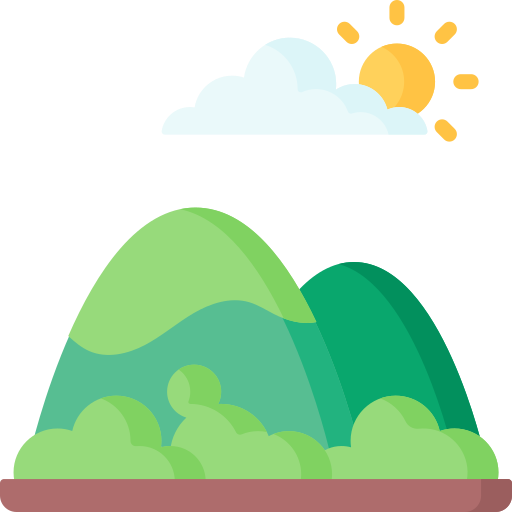
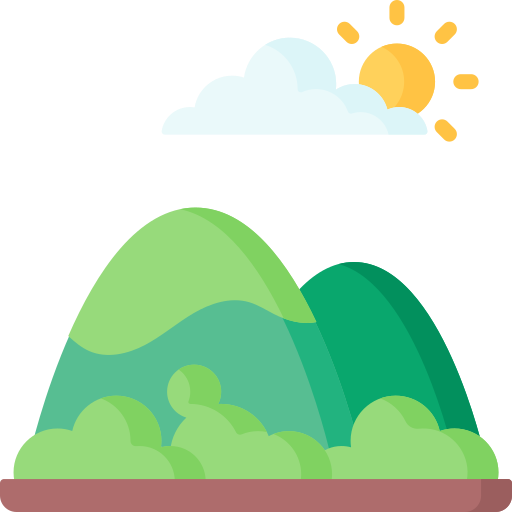
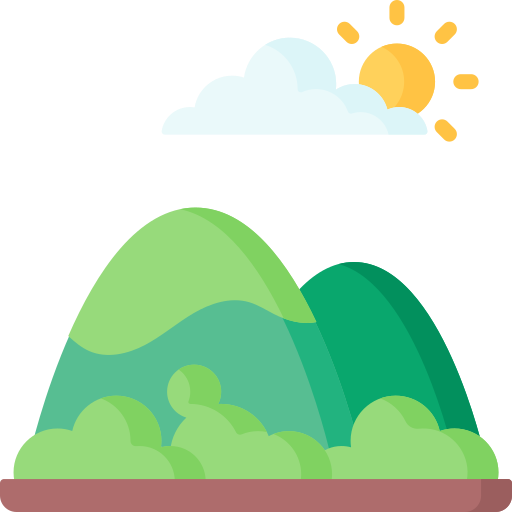
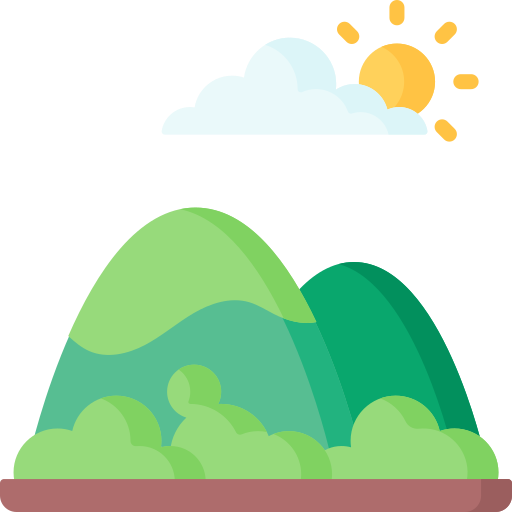
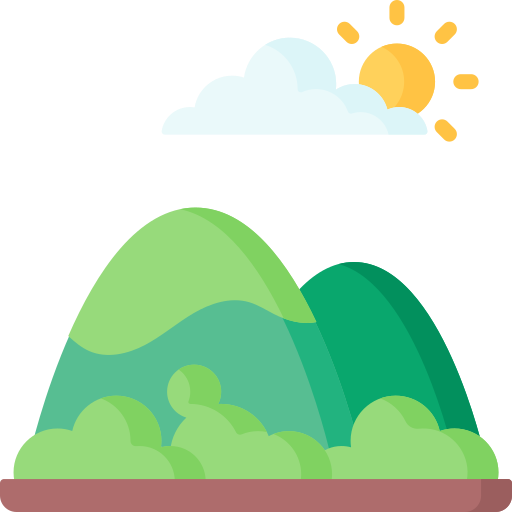
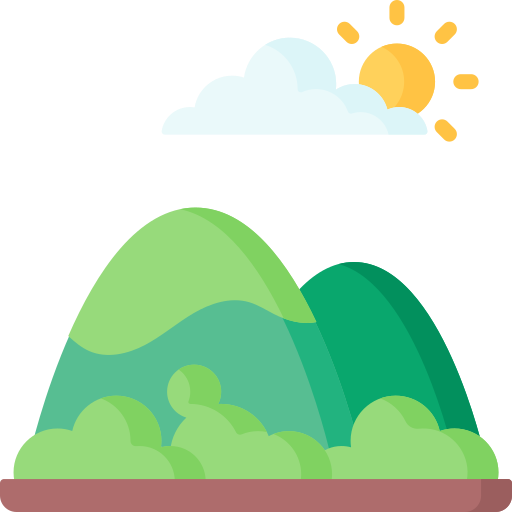
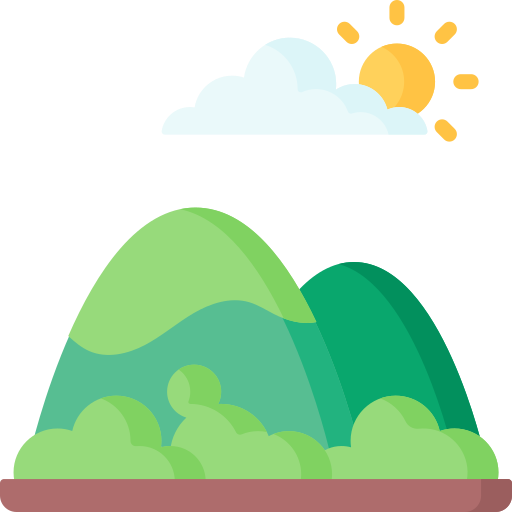
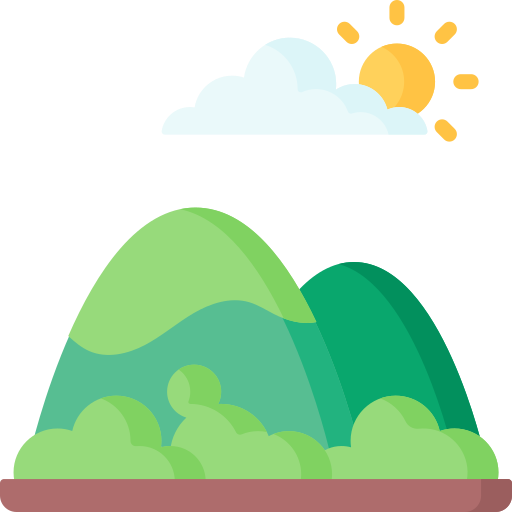
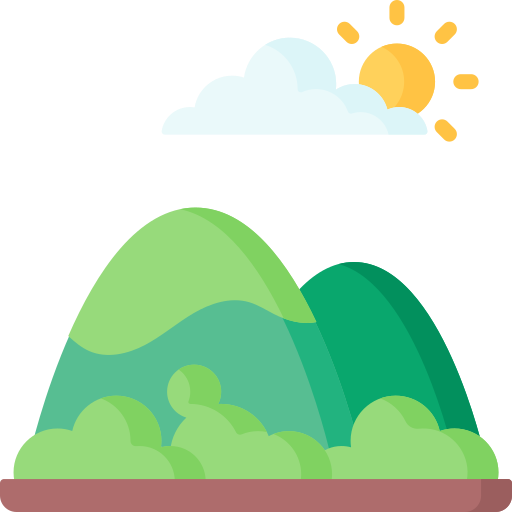
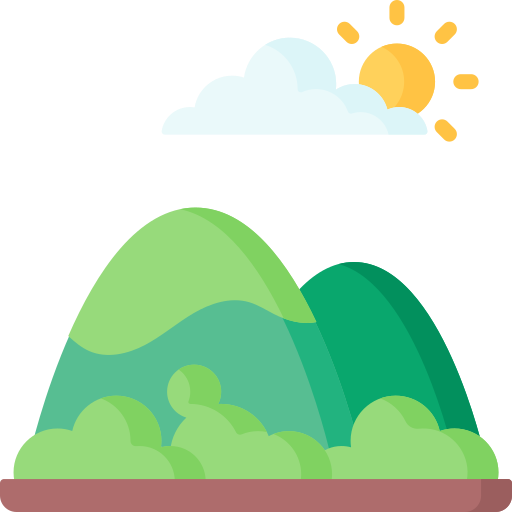
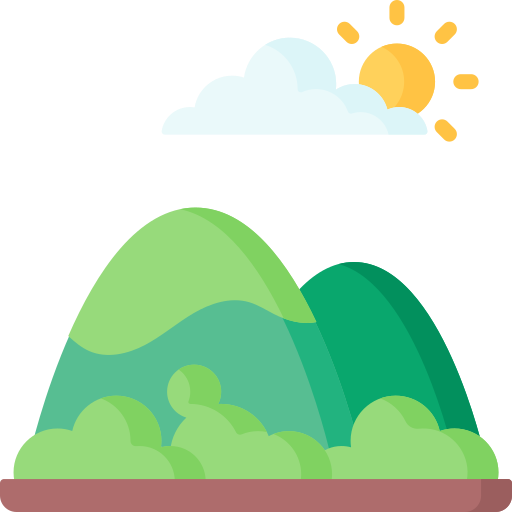
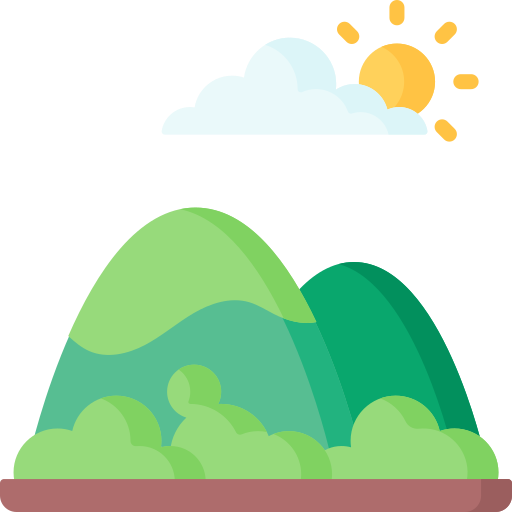
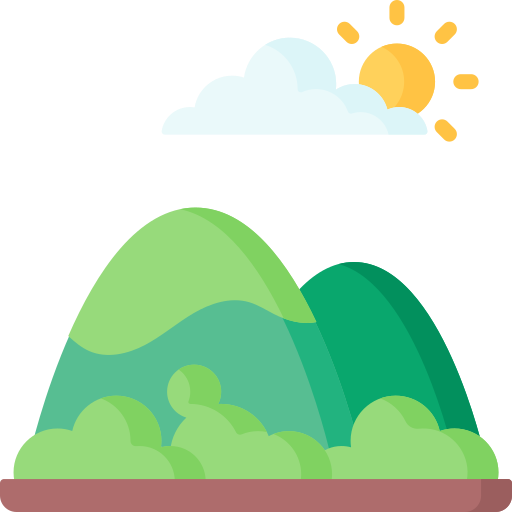
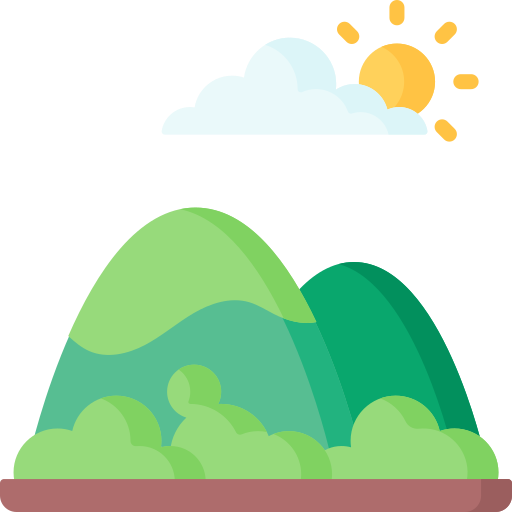
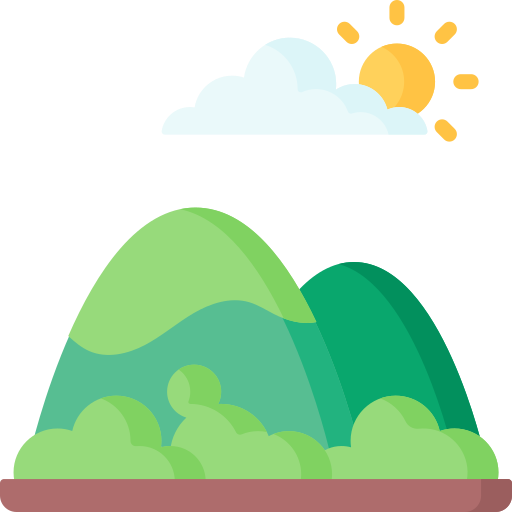
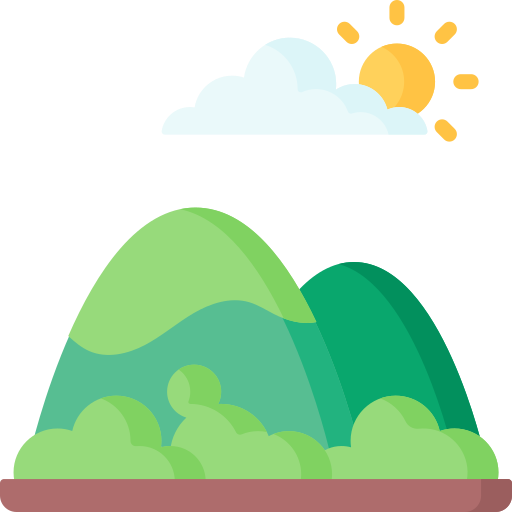
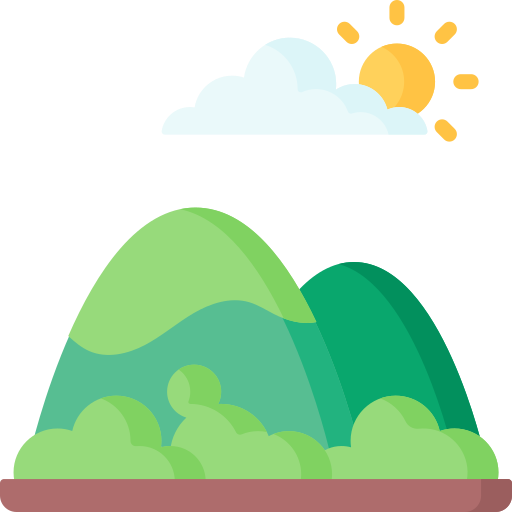
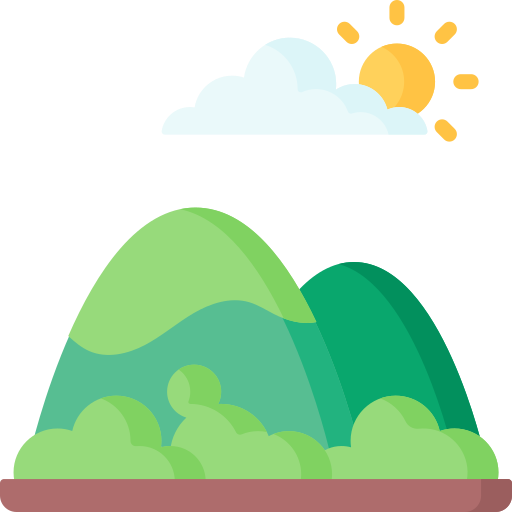
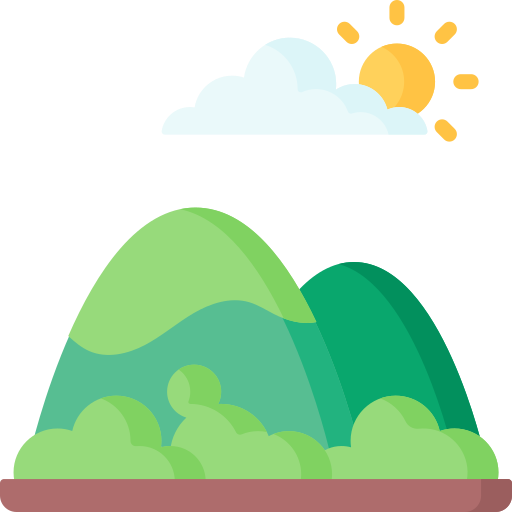
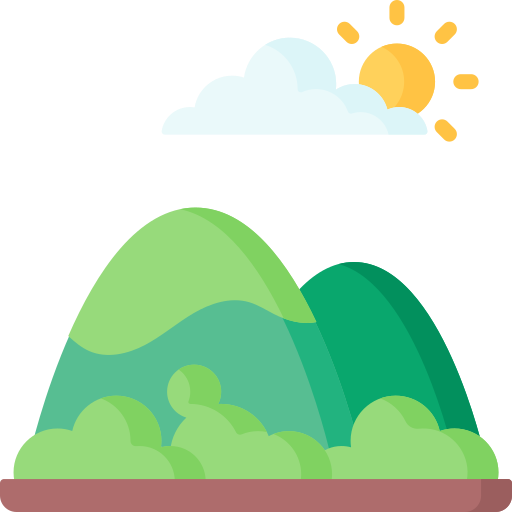
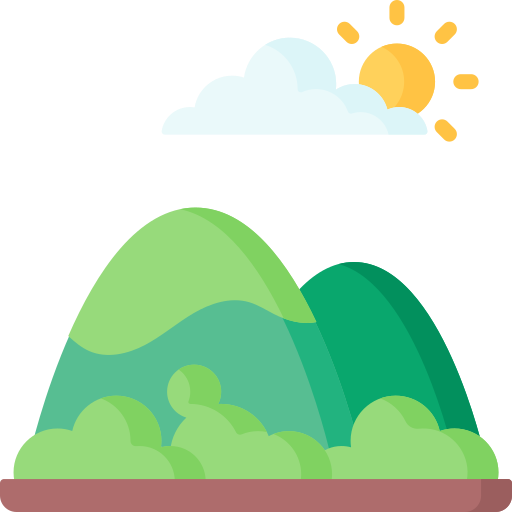
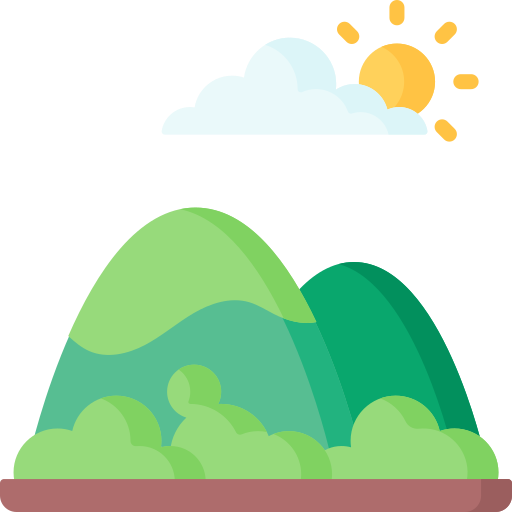
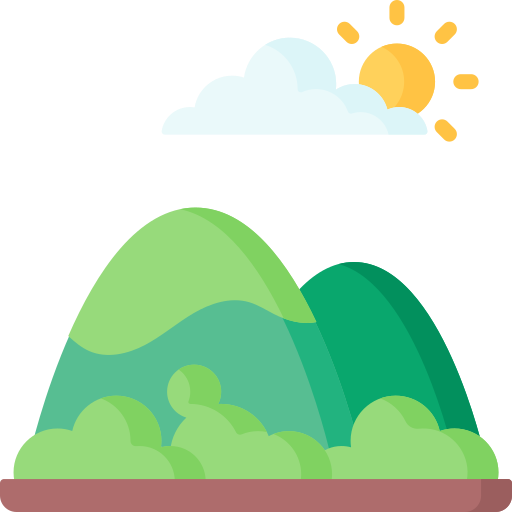
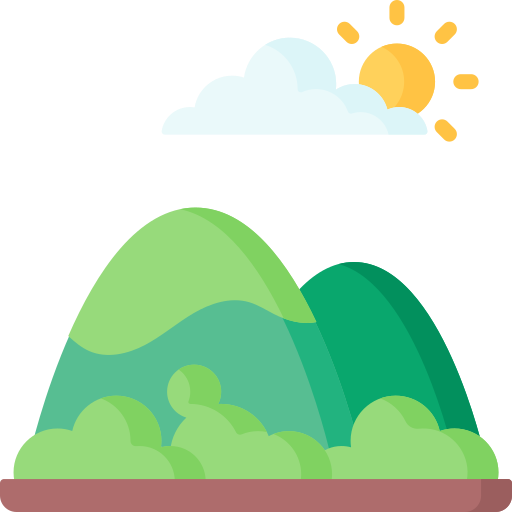
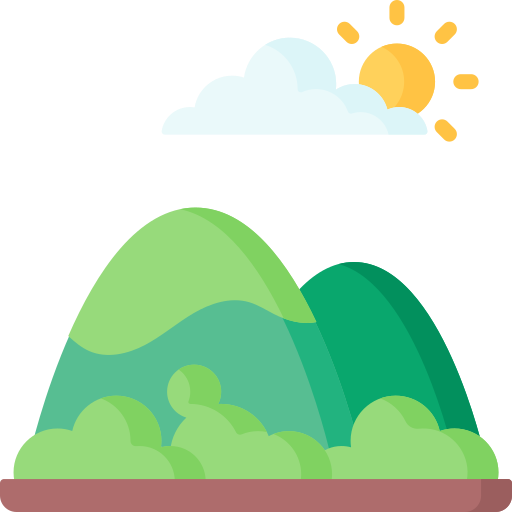
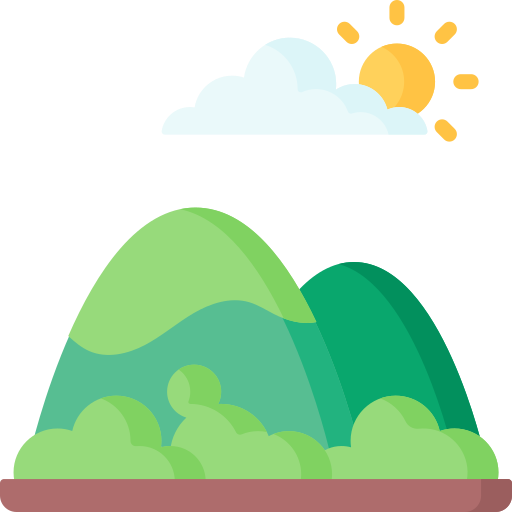
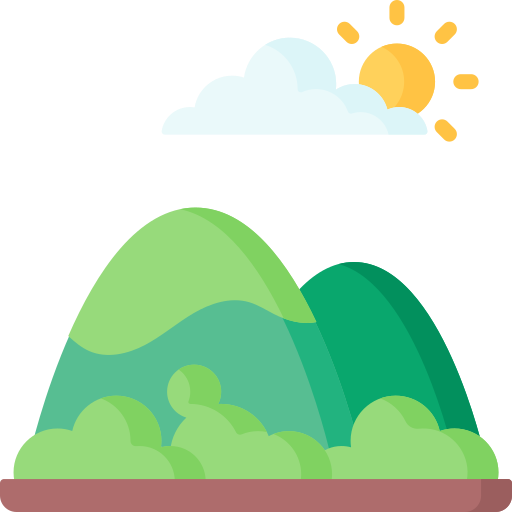
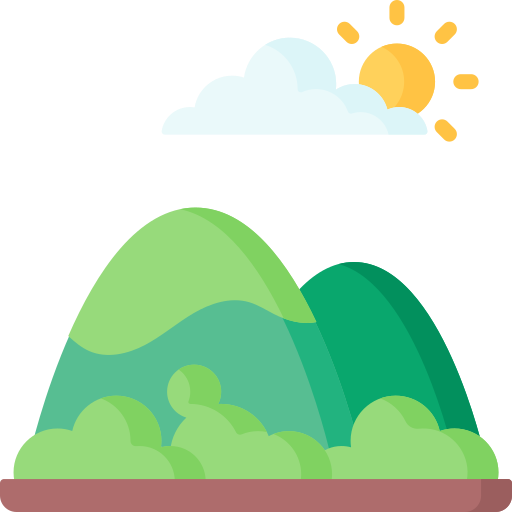
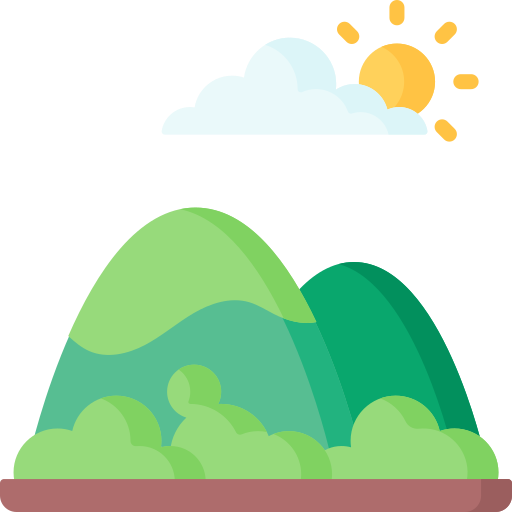
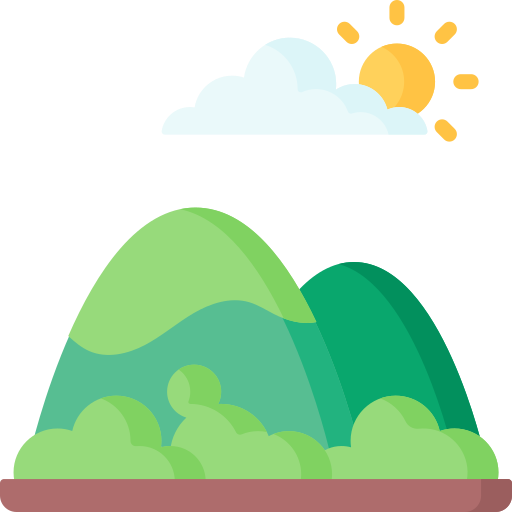
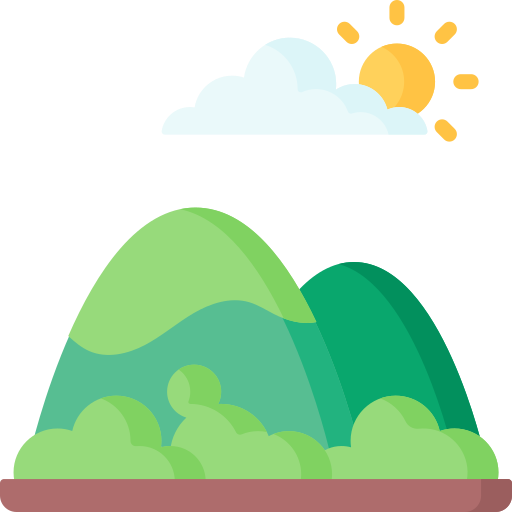
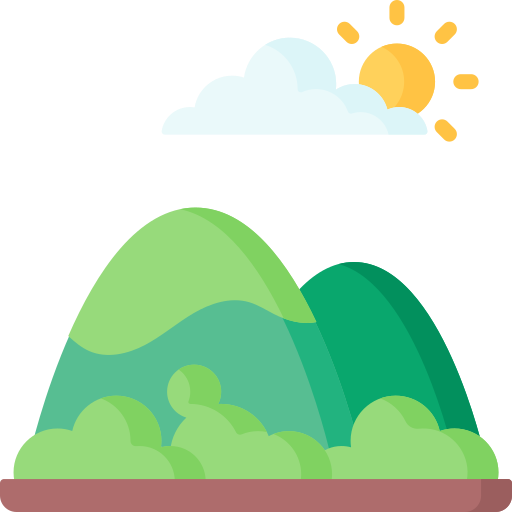
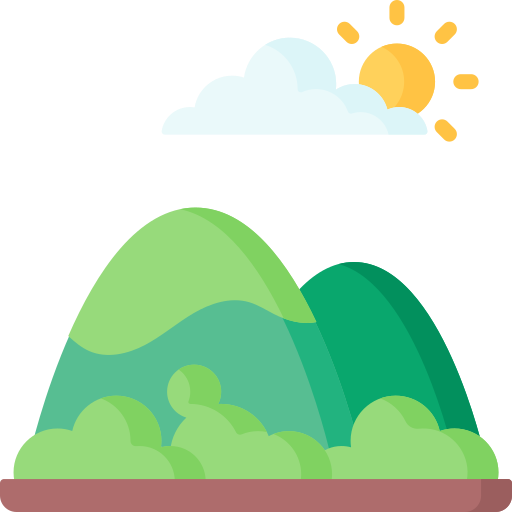
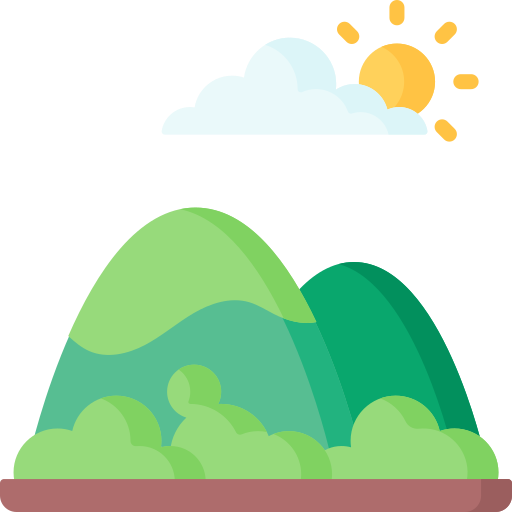
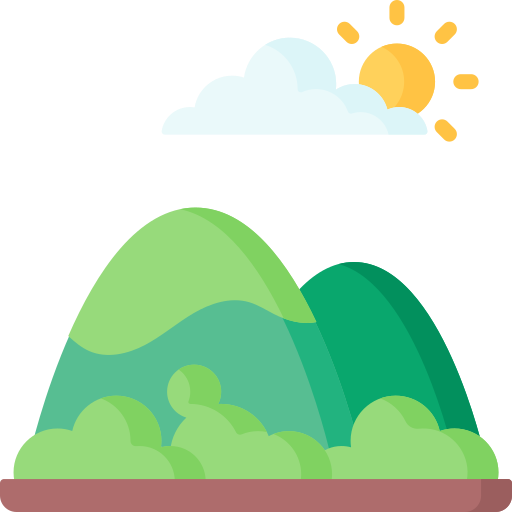
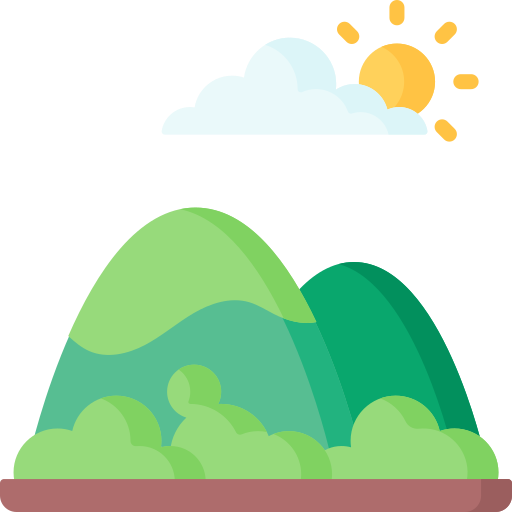
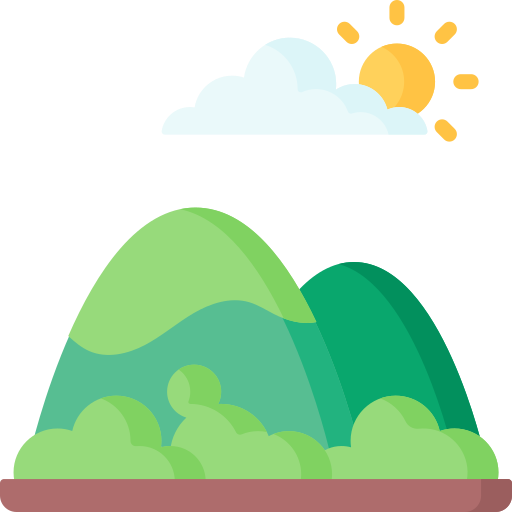
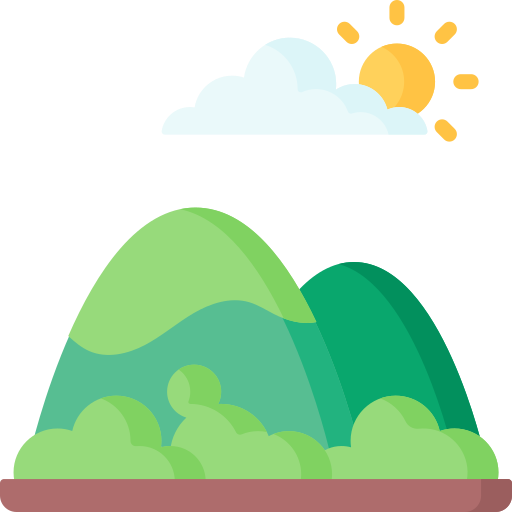
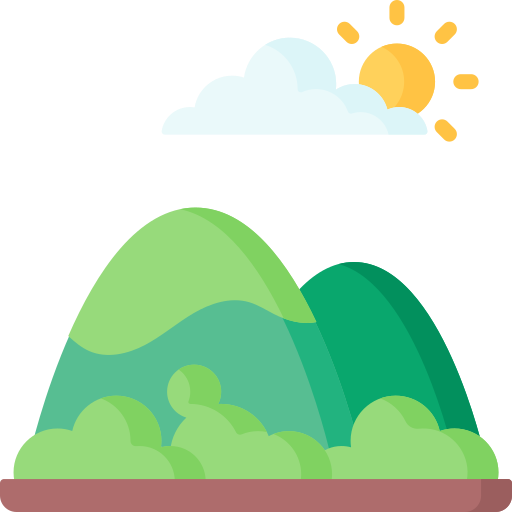
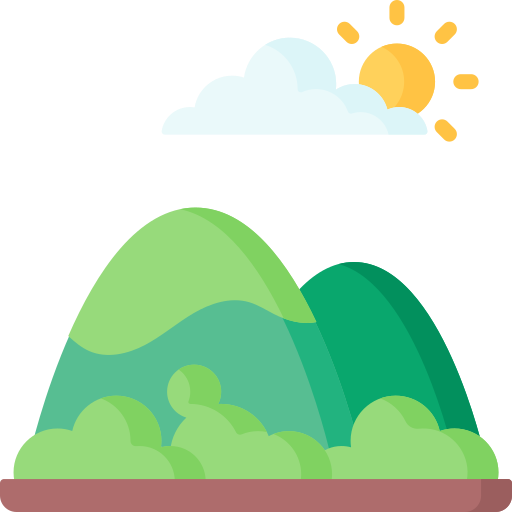
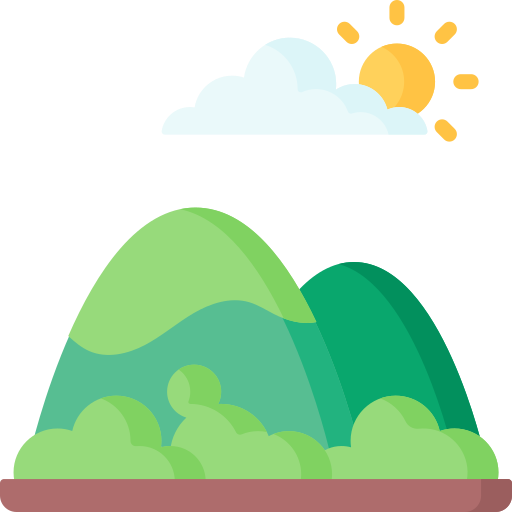
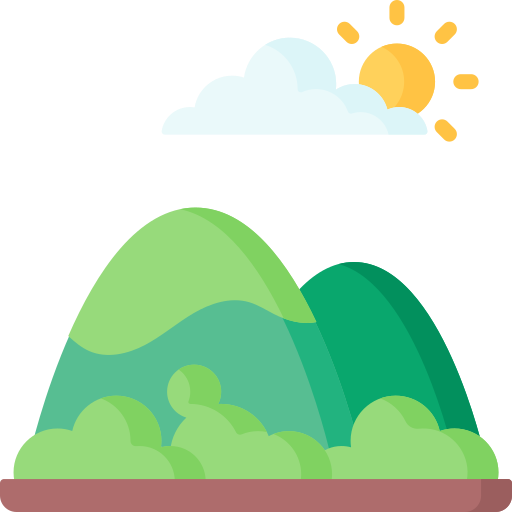
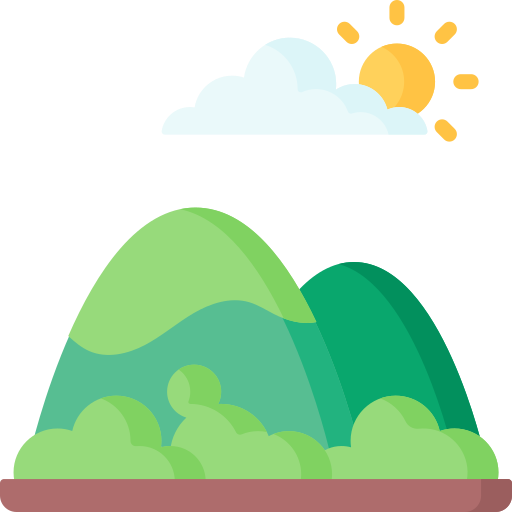
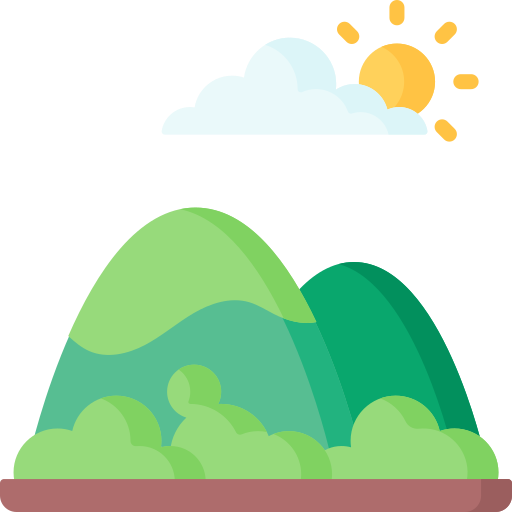
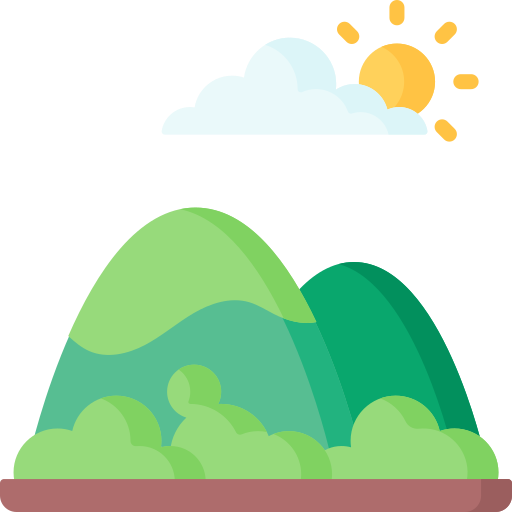

In [41]:
from folium.features import CustomIcon

m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'


for i in range(오름.shape[0]):
    #print(오름.iloc[i]['오름명'], 오름.iloc[i]['위도'], 오름.iloc[i]['경도'])
    
    icon_image = 'mountain.png'
    icon = CustomIcon(
        icon_image,
        icon_size = (20, 20),
        popup_anchor = (30, -30)
    )

    folium.Marker(
        [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
        popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
        주차장 : {오름.iloc[i]["주차장"]}<br>\
        화장실: {오름.iloc[i]["화장실"]}<br>\
        </div>',
        tooltip = tooltip,
        icon = icon
    ).add_to(m)


m

In [45]:
from folium.features import CustomIcon

m = folium.Map(
    location=[33.3684955195788, 126.52918183373025],
    #tiles = 'Stamen Terrain',
    zoom_start=10
    
)

tooltip = 'Click!'

주차장유 = folium.FeatureGroup(name='주차장유').add_to(m)
주차장무 = folium.FeatureGroup(name='주차장무').add_to(m)

for i in range(오름.shape[0]):
    if 오름.iloc[i]["주차장"] == "Y":
        folium.Marker(
            [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
            popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
            주차장 : {오름.iloc[i]["주차장"]}<br>\
            화장실: {오름.iloc[i]["화장실"]}<br>\
            </div>',
            tooltip = tooltip
        ).add_to(주차장유)
        
    else: 
        folium.Marker(
            [오름.iloc[i]['위도'], 오름.iloc[i]['경도']],
            popup = f'<div style="width:100px"><strong>{오름.iloc[i]["오름명"]}</strong><br>\
            주차장 : {오름.iloc[i]["주차장"]}<br>\
            화장실: {오름.iloc[i]["화장실"]}<br>\
            </div>',
            tooltip = tooltip
        ).add_to(주차장무)


folium.LayerControl(collapsed=False).add_to(m)
m

In [46]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location = [33.3684955195788, 126.52918183373025],
    zoom_start = 10
)

locations = [[33.24275343637512, 126.31353238508069],
             [33.46220372339229, 126.31353238508069]]

cluster = MarkerCluster(locations = locations)
cluster.add_to(m)

m

### 그 외에 좋은 기능들

In [47]:
from folium.plugins import MousePosition

m = folium.Map()
MousePosition().add_to(m)

m

In [49]:
m = folium.Map()
m.add_child(
    folium.ClickForMarker(
        popup=f'마커를 찍고 있습니다!!'
    )
)

m

In [51]:
m = folium.Map()
folium.Rectangle(
    bounds = [[60, 40], [50, 40], [60, 90], [50, 90]],
    tooltip='사각형!!'
).add_to(m)

m

In [55]:
m = folium.Map()
folium.Polygon(
    locations = [[50, 40], [60, 40], [60, 90], [50, 90], [45,75]],
    fill = True,
    tooltip='다각형!!'
).add_to(m)

m

In [56]:
m = folium.Map()

df = pd.DataFrame(data = [[2019, 500000],
                          [2020, 600000],
                          [2021, 700000]],
                   columns = ['연도', '인구'])

df

,연도,인구
0,2019,500000
1,2020,600000
2,2021,700000


In [58]:
html = df.to_html(classes='table')

folium.Marker(
    [33.38, 126.55],
    popup=html
).add_to(m)
m

In [60]:
from folium.plugins import MeasureControl
m = folium.Map(
    [33.38,  126.55],
    zoom_start = 10
)

m.add_child(MeasureControl())
m

In [61]:
from folium.plugins import Draw

m = folium.Map()
draw = Draw()
draw.add_to(m)

m

In [62]:
from folium.plugins import MeasureControl

m = folium.Map(
    [33.38,  126.55],
    zoom_start = 10
)
minimap = folium.plugins.MiniMap()
m.add_child(minimap)
m